# Segmentation and Clustering Districts in Penza

**The main points of the project:**
- Introduction
    - Description of the problem
    - Description of the data
    
- Data
    - Import Libraries
    - Prepping Data

- Exploring and clustering
    - Methodology
    - Explore data
    - Utilizing the Foursquare API
    - Cluster Districts
    - Analyze

- Results

- Conclusion

## Introduction

This project was created as the final assignment for the 
[Applied Data Science Capstone](https://www.coursera.org/learn/applied-data-science-capstone/home/info) course on [Coursera](https://www.coursera.org/). Here we will describe a problem that can be solved using Foursquare location data.

### 1. Description of the problem

Have you ever rented a house? Today, a large number of people are renting apartments. There can be many reasons: moving to another city for study, not enough money to buy housing, a business trip, etc. However, **the problem of choosing the place** where it is necessary to stop **is now more urgent than ever**.

Thousands of sites with various information are ready to offer you a huge variety of apartment options for every taste. 

- Here are some examples in Russia:
    - [cian](https://www.cian.ru/)
    - [avito](https://www.avito.ru/rossiya/kvartiry/sdam-ASgBAgICAUSSA8gQ)
    - [realty.yandex](https://realty.yandex.ru/)
    - [domofond](https://www.domofond.ru/)

Cheap and expensive, small and large, new and old, etc.<br> 
But only a few of them give a rough understanding of the area in which the apartment is located. After all, an apartment may be wonderful, but the area will spoil the impression of it. Especially true in provincial cities. Often there is **little information available**.

### In this project, we will conduct an up-to-date analysis and segment the districts of the city of Penza where apartments are rented.
> *The city of Penza was chosen, but the analysis is applicable to any other.*

Some information about the city of Penza:
* Country - Russia
* Subject of the Federation - Penza Region
* Сenter of the European part of Russia
* Area 290.377 km²
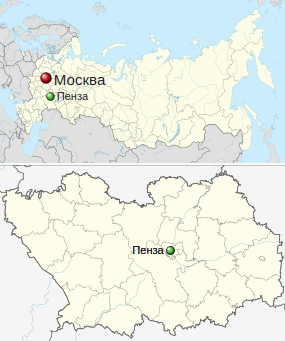
* Founded in 1663
* Population 520,300 (2020)
* Penza is divided into four urban areas::
    - Железнодорожный (Zheleznodorozhnyy) — 114,408 people
    - Ленинский (Leninskiy) — 90,479 people
    - Октябрьский (Oktyabr'skiy) — 182,336 people
    - Первомайский (Pervomayskiy) — 133,077 people

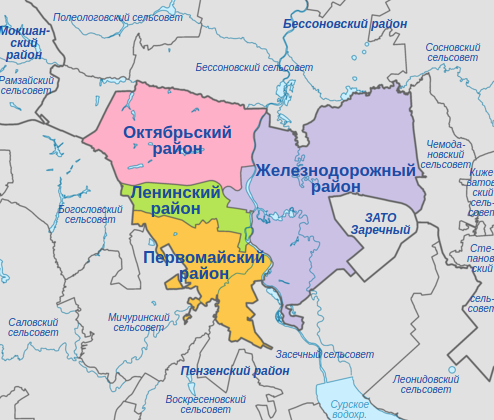

The information was taken from [Wikipedia](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D0%BD%D0%B7%D0%B0)

### 2. Description of the data

For the project I am using the following data:
1. Open Data from the [cian](https://www.cian.ru/) website with current apartment rental offers on 03/02/2021
    - The raw data is a .txt file with HTML code obtained from the site.
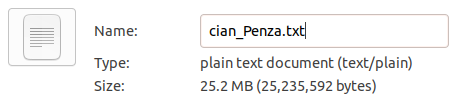
___


2. Location data retrieved from [GeoPy](https://geopy.readthedocs.io/en/stable/)
    - With this tool, we get **Latitude** and **Longitude** of Locations

3. The [Foursquare](https://foursquare.com/) location data


## Data

### 1. Import Libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner
import re # this module provides regular expression matching operations 

from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # library to handle requests

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 

import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

### 2. Prepping Data

First, let's process the data from the **cian_Penza.txt** that contains information from ads, in order to obtain and transform the data into a pandas dataframe. In this step, we will use the library **BeautifulSoup**.

1. Read Data from cian_Penza.txt.

In [2]:
with open('Data/cian_Penza.txt', 'r') as file:
    list_html = file.readlines()
    html = ''.join(list_html)
    soup = BeautifulSoup(html, 'html5lib')

___

2. The data we need is stored in tags **'article'**. Therefore, we will find them all and save them to a variable **articles**.

In [3]:
articles = soup.find_all('article')

___

3. Clearing data

In [4]:
# Function for removing side and extra lines.
def dellete(data):
    if 'Ещё объекты' in pre_data[5]:
        del data[5]
    if ('Подробнее' in pre_data[6]) or ('owner' in pre_data[6]):
        del data[6]
    if 'Сдаем' in pre_data[7]:
        del data[7]
    if '' == data[7]:
        data[7] = data[8]
        data[8] = '0 ₽/мес.'
    if '+7 9' not in data[9]:
        del data[9]
    if ('Собственник' in data[10]) or ('Ещё объекты' in data[10]):
        del data[10]
    if 'Ещё объекты' in data[11]:
        del data[11]
    
    return data

Create a loop that will iterate over each line from the **articles**, get the necessary data and write it to the variable **data**. Also, we will exclude announcements of apartments for daily rent.

In [5]:
data = []
for i in range(0, len(articles)):
    
    a = (articles[i].find_all('a'))
    pre_data = []
    for j in range(0, len(a)):
        if j in [0, 7]:
            continue
        elif a[j].string is None:
            pre_data.append('owner')
            continue
        pre_data.append(a[j].string)
    
    pre_data.append(articles[i].find_all('img')[0].get('src'))
    
    span = (articles[i].find_all('span'))
    for j in range(1, len(span)):
        if span[j].string is None:
            pre_data.append('')
            continue
        pre_data.append(span[j].string)
        
    p = (articles[i].find_all('p'))
    for j in range(0, len(p)):
        if p[j].string is None:
            pre_data.append('')
            continue
        pre_data.append(p[j].string)
    
    
    if len(pre_data) > 13:
        prepre_data = dellete(pre_data)
        pre_data = dellete(prepre_data)
    
    if len(pre_data) < 13:
        print(pre_data)
        n = input()
        pre_data[n] = ''
    if 'Посуточно' in pre_data[12]:
        continue
    else:
        data.append(pre_data)

An example of a received ad:

In [6]:
data[0]

['Пензенская область',
 'Пенза',
 'р-н Октябрьский',
 'проспект Строителей',
 '152',
 'student city',
 'https://cdn-p.cian.site/images/43/309/101/kvartira-penza-prospekt-stroiteley-1019033481-4.jpg',
 '3-комн. кв., 64 м², 4/10 этаж',
 '11 000 ₽/мес.',
 '+7 960 325-16-...',
 '2 недели назад',
 '12 фев, 11:35',
 'От года, 11 000 ₽ + 2 000 ₽ комм. платежи (без счётчиков), комиссия 50%, без залога',
 'Сдам 3-х ком. квартиру на длительный срок по пр.Строителей 152 квартира чистая, теплая, мебелированная, имеется вся бытовая техника']

___

4. Save the data to a DataFrame - **data_Penza**. Use regular expressions from the library **re** to highlight specific information.

In [7]:
data_Penza = pd.DataFrame(columns=['FullAdress', 'District', 'Address',
                                   'NumHouse', 'Tenant', 'NumRooms',
                                   'Area', 'Floor', 'RentPrice', 'LeaseTerm', 'CommunalPayments',
                                   'Meters', 'Commission', 'Pledge', 'Description'])
for i,flat in enumerate(data):
    try:
        District = flat[2]
        if 'проезд' in flat[3]:
            Address = flat[3][10:] + ' ' + flat[3][:6]
        else:
            Address = flat[3]
        NumHouse = flat[4]
        Tenant = flat[5]
        try:
            about_flat = flat[7].split(', ')
            try:
                if 'Студия' in about_flat[0]:
                    NumRooms = '1' + about_flat[0]
                else:
                    NumRooms = about_flat[0]
            except:
                NumRooms = about_flat[0]
            Area = about_flat[1][:-2]
            Floor = about_flat[2][:2].replace('/', '')
        except IndexError:
            NumRooms = None
            Area = None
            Floor = None
        RentPrice = flat[8][:-7].replace(' ', '')
        info = flat[12].split(', ')
        LeaseTerm = info[0]
        try:
            CommunalPayments = re.findall(r'\+ (\d+ \d+)', info[1])[0].replace(' ', '')
        except IndexError:
            CommunalPayments = '0'
        try:
            Meters = re.findall(r'платежи \((.+)\)', info[1])[0]
        except IndexError:
            Meters = 'не включены'
        Commission = info[2]
        Pledge = info[3]
        Description = flat[13]
        FullAdress = Address + ', ' + NumHouse
    
        data_Penza = data_Penza.append({'FullAdress': FullAdress, 'District': District, 'Address': Address,
                                       'NumHouse': NumHouse, 'Tenant': Tenant, 'NumRooms': NumRooms,
                                       'Area': Area, 'Floor': Floor, 'RentPrice': RentPrice, 'LeaseTerm': LeaseTerm, 'CommunalPayments': CommunalPayments,
                                       'Meters': Meters, 'Commission': Commission, 'Pledge': Pledge, 'Description': Description}, ignore_index=True)
    except IndexError:
        print(i)

Check the resulting df:

In [8]:
data_Penza.head()

FullAdress             District              Address  \
0  проспект Строителей, 152      р-н Октябрьский  проспект Строителей   
1          улица Ленина, 12      р-н Октябрьский         улица Ленина   
2     Рахманинова проезд, 5      р-н Октябрьский   Рахманинова проезд   
3   улица Терновского, 158Б     р-н Первомайский    улица Терновского   
4    улица Володарского, 75  р-н Железнодорожный   улица Володарского   

  NumHouse        Tenant     NumRooms Area Floor RentPrice LeaseTerm  \
0      152  student city  3-комн. кв.  64      4     11000   От года   
1       12  student city  3-комн. кв.  70      1     10000   От года   
2        5         ГОРОД  1-комн. кв.  30      3     11000   От года   
3     158Б         owner  1-комн. кв.  40      9     11000   От года   
4       75     Уневер-58  2-комн. кв.  62      2     11000   От года   

  CommunalPayments         Meters    Commission         Pledge  \
0             2000  без счётчиков  комиссия 50%     без залога   
1             3000  без счётчиков  комиссия 50%     без залога   
2             2000  без счётчиков  комиссия 50%     без залога   
3             2000  без счётчиков  комиссия 50%  залог 3 000 ₽   
4             2000  без счётчиков  комиссия 50%     без залога   

                                         Description  
0  Сдам 3-х ком. квартиру на длительный срок по п...  
1  Большая 3х комнатная квартира 70м2,в шикарном ...  
2  Сдается современная 1 ком квартира в развитом ...  
3  11 000 + ком.плат + 600 руб Инет и Тв (подключ...  
4  Сдается 2 ком кв на Володарского 75. Сдаётся д...

In [12]:
data_Penza.shape

(1411, 15)

In [13]:
data_Penza.describe(include = "all")

FullAdress          District     Address NumHouse Tenant  \
count              1411              1411        1411     1411   1411   
unique              304                 6          87      153     19   
top     улица Мира, 70А  р-н Первомайский  улица Мира       40  owner   
freq                 56               400         161       57    406   

           NumRooms  Area Floor RentPrice LeaseTerm CommunalPayments  \
count          1399  1399  1399      1411      1411             1411   
unique            8    62    18        27         2               17   
top     1-комн. кв.   38      3     10000   От года             2000   
freq            748   119   298       254      1399              539   

               Meters    Commission      Pledge          Description  
count            1411          1411        1411                 1411  
unique              3             7          19                  431  
top     без счётчиков  комиссия 50%  без залога  На длительный срок.  
freq             1070          1250        1270                   12

___

5. Freeing data from incorrect information

At this stage, we remove the incorrect information from the columns. In particular, you should **pay attention to duplicate data**. We will also get rid of them to improve the accuracy of the analysis.

In [14]:
data_Penza.District.unique()

array(['р-н Октябрьский', 'р-н Первомайский', 'р-н Железнодорожный',
       'р-н Ленинский', 'с. Засечное', 'Ладожская улица'], dtype=object)

In [15]:
data_Penza = data_Penza.loc[data_Penza['District'] != 'с. Засечное']
data_Penza = data_Penza.loc[data_Penza['District'] != 'Ладожская улица']
data_Penza = data_Penza.loc[data_Penza['NumHouse'] != 'Этажи Пенза']
data_Penza.dropna(subset=['Area'], axis=0, inplace=True)
data_Penza = data_Penza.drop_duplicates(keep='first')
data_Penza.reset_index(drop=True, inplace=True)
data_Penza.Area = data_Penza.Area.str.replace(",", ".")
data_Penza.Area = data_Penza.Area.astype('float')
data_Penza.RentPrice = data_Penza.RentPrice.astype('float')
data_Penza.CommunalPayments = data_Penza.CommunalPayments.astype('float')
data_Penza.Floor = data_Penza.Floor.astype('float')

In [16]:
data_Penza.District.unique()

array(['р-н Октябрьский', 'р-н Первомайский', 'р-н Железнодорожный',
       'р-н Ленинский'], dtype=object)

In [17]:
data_Penza.shape

(529, 15)

In [18]:
data_Penza.head()

FullAdress             District              Address  \
0  проспект Строителей, 152      р-н Октябрьский  проспект Строителей   
1          улица Ленина, 12      р-н Октябрьский         улица Ленина   
2     Рахманинова проезд, 5      р-н Октябрьский   Рахманинова проезд   
3   улица Терновского, 158Б     р-н Первомайский    улица Терновского   
4    улица Володарского, 75  р-н Железнодорожный   улица Володарского   

  NumHouse        Tenant     NumRooms  Area Floor  RentPrice LeaseTerm  \
0      152  student city  3-комн. кв.  64.0     4    11000.0   От года   
1       12  student city  3-комн. кв.  70.0     1    10000.0   От года   
2        5         ГОРОД  1-комн. кв.  30.0     3    11000.0   От года   
3     158Б         owner  1-комн. кв.  40.0     9    11000.0   От года   
4       75     Уневер-58  2-комн. кв.  62.0     2    11000.0   От года   

   CommunalPayments         Meters    Commission         Pledge  \
0            2000.0  без счётчиков  комиссия 50%     без залога   
1            3000.0  без счётчиков  комиссия 50%     без залога   
2            2000.0  без счётчиков  комиссия 50%     без залога   
3            2000.0  без счётчиков  комиссия 50%  залог 3 000 ₽   
4            2000.0  без счётчиков  комиссия 50%     без залога   

                                         Description  
0  Сдам 3-х ком. квартиру на длительный срок по п...  
1  Большая 3х комнатная квартира 70м2,в шикарном ...  
2  Сдается современная 1 ком квартира в развитом ...  
3  11 000 + ком.плат + 600 руб Инет и Тв (подключ...  
4  Сдается 2 ком кв на Володарского 75. Сдаётся д...

___

6. Сreate a df for Location.

In [19]:
Location = pd.DataFrame(columns=['Latitude', 'Longitude'])

___

7. Add Geo Data

**geopy** library is used to obtain data. In this loop, we go through each address in our df. If we have not received the data, we try to send the request again. We print every unsuccessful attempt. If the request is successful, then add data to df.

In [20]:
geolocator = Nominatim(user_agent="to_explorer")
count = 0
for i in range(len(data_Penza)):
    address = data_Penza.FullAdress[i] + ', Penza'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Location = Location.append({'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)
    except AttributeError:
        count += 1
        print(i, location, count)
        try:
            location = geolocator.geocode(address)
            latitude = location.latitude
            longitude = location.longitude
            Location = Location.append({'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)
        except AttributeError:
            print(i, location, ' x2')
            Location = Location.append({'Latitude': location, 'Longitude': location}, ignore_index=True)

6 None 1
6 None  x2
35 None 2
35 None  x2
73 None 3
73 None  x2
127 None 4
127 None  x2
191 None 5
191 None  x2
199 None 6
199 None  x2
202 None 7
202 None  x2
217 None 8
217 None  x2
286 None 9
286 None  x2
334 None 10
334 None  x2
336 None 11
336 None  x2
341 None 12
341 None  x2
378 None 13
378 None  x2
381 None 14
381 None  x2
395 None 15
395 None  x2
459 None 16
459 None  x2
486 None 17
486 None  x2
496 None 18
496 None  x2


We were unable to receive data for 18 addresses. We will concatenate our two df's into one new one and remove the lines with empty data.

___

8. Combining and cleaning data

In [21]:
Location.shape

(529, 2)

In [22]:
df_Penza = pd.concat([data_Penza, Location], axis=1)

In [23]:
df_Penza.dropna(subset=['Latitude'], axis=0, inplace=True)
df_Penza.reset_index(drop=True, inplace=True)
df_Penza.head(10)

FullAdress             District                   Address  \
0     проспект Строителей, 152      р-н Октябрьский       проспект Строителей   
1             улица Ленина, 12      р-н Октябрьский              улица Ленина   
2        Рахманинова проезд, 5      р-н Октябрьский        Рахманинова проезд   
3      улица Терновского, 158Б     р-н Первомайский         улица Терновского   
4       улица Володарского, 75  р-н Железнодорожный        улица Володарского   
5           Онежский проезд, 8      р-н Октябрьский           Онежский проезд   
6         улица Ворошилова, 25        р-н Ленинский          улица Ворошилова   
7  улица Генерала Глазунова, 2      р-н Октябрьский  улица Генерала Глазунова   
8          улица Суворова, 166        р-н Ленинский            улица Суворова   
9          улица Антонова, 17А  р-н Железнодорожный            улица Антонова   

  NumHouse        Tenant     NumRooms  Area Floor  RentPrice LeaseTerm  \
0      152  student city  3-комн. кв.  64.0     4    11000.0   От года   
1       12  student city  3-комн. кв.  70.0     1    10000.0   От года   
2        5         ГОРОД  1-комн. кв.  30.0     3    11000.0   От года   
3     158Б         owner  1-комн. кв.  40.0     9    11000.0   От года   
4       75     Уневер-58  2-комн. кв.  62.0     2    11000.0   От года   
5        8         owner  1-комн. кв.  42.0     5    11000.0   От года   
6       25      Губерния  1-комн. кв.  45.0     8    10000.0   От года   
7        2  student city  2-комн. кв.  56.0     5    10000.0   От года   
8      166  student city  2-комн. кв.  45.0     2    10000.0   От года   
9      17А     Уневер-58  2-комн. кв.  64.0     2    10000.0   От года   

   CommunalPayments             Meters    Commission          Pledge  \
0            2000.0      без счётчиков  комиссия 50%      без залога   
1            3000.0      без счётчиков  комиссия 50%      без залога   
2            2000.0      без счётчиков  комиссия 50%      без залога   
3            2000.0      без счётчиков  комиссия 50%   залог 3 000 ₽   
4            2000.0      без счётчиков  комиссия 50%      без залога   
5            2000.0      без счётчиков  комиссия 50%  залог 10 000 ₽   
6            3000.0  счётчики включены  комиссия 40%      без залога   
7            3000.0  счётчики включены  комиссия 40%      без залога   
8            3000.0      без счётчиков  комиссия 50%      без залога   
9            3000.0      без счётчиков  комиссия 50%      без залога   

                                         Description   Latitude  Longitude  
0  Сдам 3-х ком. квартиру на длительный срок по п...  53.220538  44.888742  
1  Большая 3х комнатная квартира 70м2,в шикарном ...  53.190840  45.167690  
2  Сдается современная 1 ком квартира в развитом ...  53.225680  44.929247  
3  11 000 + ком.плат + 600 руб Инет и Тв (подключ...  53.144821  45.024579  
4  Сдается 2 ком кв на Володарского 75. Сдаётся д...  53.531596  43.668885  
5  Сдаётся современная комфортная 1ком квартира з...  53.218907  44.942595  
6  Сдам квартиру на долгий срок. Квартира чистая,...  53.189663  44.000708  
7  Сдается двухкомнатная квартира на длительный с...  53.232508  44.875841  
8  Сдам квартиру в 2х минутах ходьбы от Филармони...  53.203453  44.989078  
9  Сдаётся 2-х квартира на длительный срок по ули...  53.187000  45.061926

___

9. Saving progress

In [24]:
df_Penza.to_csv('Data_Penza.csv', encoding='utf-8', index=False)

---

## Exploring and clustering

### 1. Methodology

In this project we will direct our efforts on detecting areas of Penza that have the best rates for rental housing. We restrict our analysis to the city and nearby settlements. 

In first step we have collected the required data: location and information of every apartment that is available for long-term rent and on the Cyan website. 

Now, we will identified Districts (according to Foursquare categorization).

### 2. Explore data

First, let's examine the data.

In [32]:
df_Penza.describe(include = "all")

FullAdress          District     Address NumHouse        Tenant  \
count               511               511         511      511           511   
unique              281                 4          78      147            15   
top     улица Мира, 70А  р-н Первомайский  улица Мира      70А  student city   
freq                 21               147          57       21           140   
mean                NaN               NaN         NaN      NaN           NaN   
std                 NaN               NaN         NaN      NaN           NaN   
min                 NaN               NaN         NaN      NaN           NaN   
25%                 NaN               NaN         NaN      NaN           NaN   
50%                 NaN               NaN         NaN      NaN           NaN   
75%                 NaN               NaN         NaN      NaN           NaN   
max                 NaN               NaN         NaN      NaN           NaN   

           NumRooms        Area       Floor     RentPrice LeaseTerm  \
count           511  511.000000  511.000000    511.000000       511   
unique            8         NaN         NaN           NaN         2   
top     1-комн. кв.         NaN         NaN           NaN   От года   
freq            232         NaN         NaN           NaN       508   
mean            NaN   40.991585    4.976517   9364.970646       NaN   
std             NaN   10.942055    3.256884   2835.932939       NaN   
min             NaN   20.000000    1.000000      0.000000       NaN   
25%             NaN   35.000000    3.000000   7500.000000       NaN   
50%             NaN   38.000000    4.000000   9000.000000       NaN   
75%             NaN   45.000000    7.000000  10000.000000       NaN   
max             NaN   90.000000   22.000000  30000.000000       NaN   

        CommunalPayments         Meters    Commission      Pledge  \
count         511.000000            511           511         511   
unique               NaN              3             6          18   
top                  NaN  без счётчиков  комиссия 50%  без залога   
freq                 NaN            411           462         473   
mean         1627.592955            NaN           NaN         NaN   
std           997.428988            NaN           NaN         NaN   
min             0.000000            NaN           NaN         NaN   
25%          1000.000000            NaN           NaN         NaN   
50%          2000.000000            NaN           NaN         NaN   
75%          2000.000000            NaN           NaN         NaN   
max          6000.000000            NaN           NaN         NaN   

                Description    Latitude   Longitude  
count                   511  511.000000  511.000000  
unique                  404         NaN         NaN  
top     На длительный срок.         NaN         NaN  
freq                      4         NaN         NaN  
mean                    NaN   53.230265   44.822160  
std                     NaN    0.152592    0.554998  
min                     NaN   52.507437   42.631836  
25%                     NaN   53.184474   44.892959  
50%                     NaN   53.198346   44.978257  
75%                     NaN   53.225104   45.013015  
max                     NaN   53.933797   46.626542

In [36]:
df_Penza_test3 = df_Penza
df_Penza_test3.groupby(['District']).mean().corr()

Area     Floor  RentPrice  CommunalPayments  Latitude  \
Area              1.000000  0.483390  -0.498150         -0.803396  0.249878   
Floor             0.483390  1.000000  -0.253167         -0.236704 -0.683176   
RentPrice        -0.498150 -0.253167   1.000000          0.891671  0.154473   
CommunalPayments -0.803396 -0.236704   0.891671          1.000000 -0.185075   
Latitude          0.249878 -0.683176   0.154473         -0.185075  1.000000   
Longitude         0.496442  0.330231  -0.996027         -0.872008 -0.235065   

                  Longitude  
Area               0.496442  
Floor              0.330231  
RentPrice         -0.996027  
CommunalPayments  -0.872008  
Latitude          -0.235065  
Longitude          1.000000

In [37]:
df_Penza_test2 = df_Penza[['District', 'Address']]
df_Penza_test2_group = df_Penza_test2.groupby(['District']).count()

In [38]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_Penza_test2_group.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 600
р-н Железнодорожный: 113
р-н Ленинский: 149
р-н Октябрьский: 166
р-н Первомайский: 173


<Figure size 432x288 with 0 Axes>

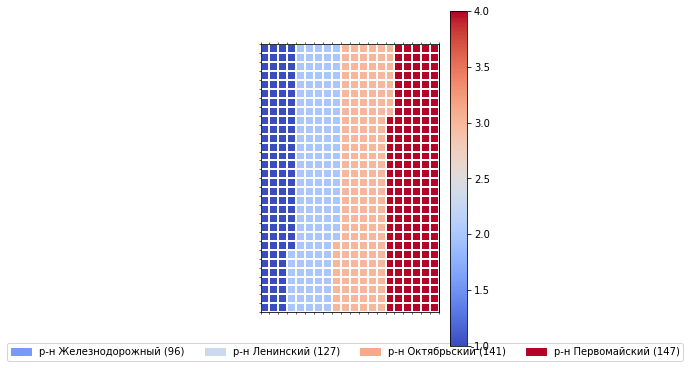

In [42]:
width = 20 # width of chart
height = 30 # height of chart

categories = df_Penza_test2_group.index.values # categories
values = df_Penza_test2_group['Address'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

The number of apartments for rent by district is approximately the same, except for the Zheleznodorozhnyy.

Build a map and put our data on it.

In [43]:
address = 'Penza'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Penza are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Penza are 53.200001, 45.0.


In [45]:
# create map of Penza using latitude and longitude values
map_penza = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_Penza['Latitude'], df_Penza['Longitude'], df_Penza['District'], df_Penza['FullAdress']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_penza)  
    
map_penza

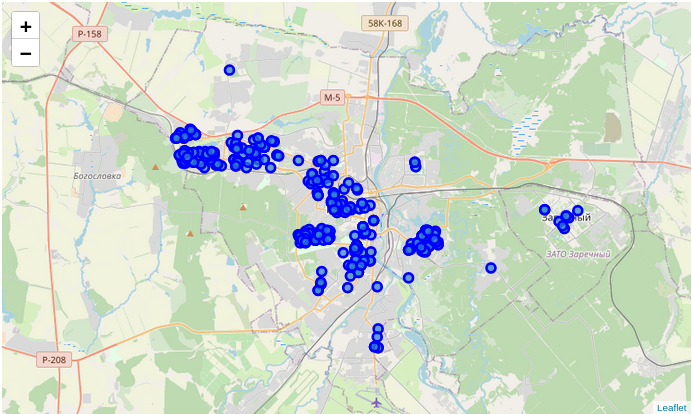

___

### 3. Utilizing the Foursquare API

At this stage, we will use **Foursquare API**

In [46]:
CLIENT_ID = # Foursquare ID
CLIENT_SECRET = # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 400 # A default Foursquare API limit value

In [47]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [48]:
penza_venues = getNearbyVenues(names=df_Penza['FullAdress'],
                                   latitudes=df_Penza['Latitude'],
                                   longitudes=df_Penza['Longitude'])

In [49]:
print(penza_venues.shape)
penza_venues.head()

(1496, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  проспект Строителей, 152              53.220538               44.888742   
1  проспект Строителей, 152              53.220538               44.888742   
2  проспект Строителей, 152              53.220538               44.888742   
3  проспект Строителей, 152              53.220538               44.888742   
4  проспект Строителей, 152              53.220538               44.888742   

                  Venue  Venue Latitude  Venue Longitude        Venue Category  
0              IL Патио       53.222137        44.888555    Italian Restaurant  
1               Марсель       53.219808        44.889450  Fast Food Restaurant  
2              MOJO BAR       53.222374        44.888501          Cocktail Bar  
3                   KFC       53.222357        44.888890  Fast Food Restaurant  
4  Планета Мировое кафе       53.222108        44.888655    Dim Sum Restaurant

In [138]:
penza_venues.Venue.value_counts()

Магнит                                                       63
Караван                                                      38
Слобода                                                      32
Spar                                                         25
Дюсш                                                         24
Papa's Pizza                                                 21
Атак                                                         19
Универ 58                                                    19
Денер-Бистро                                                 19
ТЦ "На Красной"                                              18
Золотая Шайба                                                18
Duty Free                                                    18
Медведь                                                      17
Велес                                                        17
Пятерочка                                                    17
Киноконцертный зал "Пенза"              

In [50]:
print('There are {} uniques categories.'.format(len(penza_venues['Venue Category'].unique())))

There are 123 uniques categories.


In [51]:
penza_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                              
 Виноградный проезд, 8                                2   
 Онежский проезд, 8                                   3   
Заречная улица, 3                                     6   
Коннозаводская улица, 25/1                            4   
Красная улица, 3                                      6   
Красная улица, 49А                                   14   
Красная улица, 51А                                   12   
Красная улица, 64                                     5   
Красная улица, 9                                      4   
Кронштадтская улица, 1                                4   
Ладожская улица, 110                                  2   
Ладожская улица, 126                                  6   
Ладожская улица, 128                                  2   
Ладожская улица, 149                                  2   
Ладожская улица, 150                                  1   
Ладожская улица, 153                                  4   
Ладожская улица, 155                                  2   
Ладожская улица, 156                                  1   
Ладожская улица, 157                                  6   
Ладожская улица, 162                                  3   
Ладожская улица, 164                                  2   
Ладожская улица, 51а                                  1   
Ладожская улица, 79                                   5   
Московская улица, 109А                                8   
Московская улица, 30а                                18   
Московская улица, 36/8                               50   
Московская улица, 82                                  6   
Одесская улица, 4А                                    6   
Российская улица, 45                                  1   
Саратовская улица, 15                                 1   
Тамбовская улица, 23                                 24   
Тамбовская улица, 9А                                  4   
Тернопольская улица, 10                               6   
Ударная улица, 41                                     2   
Ульяновская улица, 11                                 9   
Ульяновская улица, 21                                 1   
Ульяновская улица, 23                                 4   
проспект Победы, 126                                  2   
проспект Победы, 16                                   6   
проспект Победы, 2                                    4   
проспект Победы, 27                                  14   
проспект Победы, 84                                   2   
проспект Победы, 96Е                                 45   
проспект Победы, 97                                   4   
проспект Строителей, 108                              5   
проспект Строителей, 114                              6   
проспект Строителей, 142                              4   
проспект Строителей, 152                             33   
проспект Строителей, 172                              4   
проспект Строителей, 30                               2   
проспект Строителей, 44А                              2   
проспект Строителей, 45                               8   
проспект Строителей, 49                               6   
проспект Строителей, 59                               7   
проспект Строителей, 68                               1   
проспект Строителей, 68а                              1   
проспект Строителей, 71                               4   
проспект Строителей, 74А                              4   
улица 65-летия Победы, 11                             3   
улица 65-летия Победы, 15                             1   
улица 65-летия Победы, 3                              2   
улица 65-летия Победы, 5                              4   
улица 65-летия Победы, 9                              1   
улица 8 Марта, 15                                     2   
улица 8 Марта, 17                                     2   
улица 8 Марта, 25                                     3   
улица 8 Марта, 7      

In [52]:
# one hot encoding
penza_onehot = pd.get_dummies(penza_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
penza_onehot['Neighborhood'] = penza_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [penza_onehot.columns[-1]] + list(penza_onehot.columns[:-1])
penza_onehot = penza_onehot[fixed_columns]

penza_onehot.head()

Neighborhood  ATM  American Restaurant  Aquarium  Arcade  \
0  проспект Строителей, 152    0                    0         0       0   
1  проспект Строителей, 152    0                    0         0       0   
2  проспект Строителей, 152    0                    0         0       0   
3  проспект Строителей, 152    0                    0         0       0   
4  проспект Строителей, 152    0                    0         0       0   

   Art Gallery  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0            0                 0                   0              0   
1            0                 0                   0              0   
2            0                 0                   0              0   
3            0                 0                   0              0   
4            0                 0                   0              0   

   BBQ Joint  Bagel Shop  Bakery  Bar  Basketball Stadium  Beach  \
0          0           0       0    0                   0      0   
1          0           0       0    0                   0      0   
2          0           0       0    0                   0      0   
3          0           0       0    0                   0      0   
4          0           0       0    0                   0      0   

   Bed & Breakfast  Big Box Store  Bookstore  Bowling Alley  Breakfast Spot  \
0                0              0          0              0               0   
1                0              0          0              0               0   
2                0              0          0              0               0   
3                0              0          0              0               0   
4                0              0          0              0               0   

   Brewery  Bus Station  Business Service  Cafeteria  Café  Camera Store  \
0        0            0                 0          0     0             0   
1        0            0                 0          0     0             0   
2        0            0                 0          0     0             0   
3        0            0                 0          0     0             0   
4        0            0                 0          0     0             0   

   Candy Store  Casino  Castle  Caucasian Restaurant  Clothing Store  \
0            0       0       0                     0               0   
1            0       0       0                     0               0   
2            0       0       0                     0               0   
3            0       0       0                     0               0   
4            0       0       0                     0               0   

   Cocktail Bar  Coffee Shop  Comedy Club  Concert Hall  Convenience Store  \
0             0            0            0             0                  0   
1             0            0            0             0                  0   
2             1            0            0             0                  0   
3             0            0            0             0                  0   
4             0            0            0             0                  0   

   Cosmetics Shop  Cupcake Shop  Dance Studio  Deli / Bodega  \
0               0             0             0              0   
1               0             0             0              0   
2               0             0             0              0   
3               0             0             0              0   
4               0             0             0              0   

   Department Store  Dessert Shop  Dim Sum Restaurant  Diner  \
0                 0             0                   0      0   
1                 0             0                   0      0   
2                 0             0                   0      0   
3                 0             0                   0      0   
4                 0             0                   1      0   

   Doner Restaurant  Donut Shop  Electronics Store  Fast Food Restaurant  \
0                 0           0                 

In [53]:
penza_onehot.shape

(1496, 124)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [54]:
penza_grouped = penza_onehot.groupby('Neighborhood').mean().reset_index()
penza_grouped.head()

Neighborhood  ATM  American Restaurant  Aquarium  Arcade  \
0       Виноградный проезд, 8  0.0                  0.0       0.0     0.0   
1          Онежский проезд, 8  0.0                  0.0       0.0     0.0   
2           Заречная улица, 3  0.0                  0.0       0.0     0.0   
3  Коннозаводская улица, 25/1  0.0                  0.0       0.0     0.0   
4            Красная улица, 3  0.0                  0.0       0.0     0.0   

   Art Gallery  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0          0.0               0.0                 0.0            0.0   
1          0.0               0.0                 0.0            0.0   
2          0.0               0.0                 0.0            0.0   
3          0.0               0.0                 0.0            0.0   
4          0.0               0.0                 0.0            0.0   

   BBQ Joint  Bagel Shop  Bakery  Bar  Basketball Stadium  Beach  \
0        0.0        0.00     0.0  0.0                 0.0    0.0   
1        0.0        0.00     0.0  0.0                 0.0    0.0   
2        0.0        0.00     0.0  0.0                 0.0    0.0   
3        0.0        0.25     0.0  0.0                 0.0    0.0   
4        0.0        0.00     0.0  0.0                 0.0    0.0   

   Bed & Breakfast  Big Box Store  Bookstore  Bowling Alley  Breakfast Spot  \
0              0.0            0.0        0.0            0.0             0.0   
1              0.0            0.0        0.0            0.0             0.0   
2              0.0            0.0        0.0            0.0             0.0   
3              0.0            0.0        0.0            0.0             0.0   
4              0.0            0.0        0.0            0.0             0.0   

   Brewery  Bus Station  Business Service  Cafeteria      Café  Camera Store  \
0      0.0          0.0               0.0        0.0  0.000000           0.0   
1      0.0          0.0               0.0        0.0  0.000000           0.0   
2      0.0          0.0               0.0        0.0  0.333333           0.0   
3      0.0          0.0               0.0        0.0  0.000000           0.0   
4      0.0          0.0               0.0        0.0  0.000000           0.0   

   Candy Store  Casino  Castle  Caucasian Restaurant  Clothing Store  \
0          0.0     0.0     0.0                   0.0             0.0   
1          0.0     0.0     0.0                   0.0             0.0   
2          0.0     0.0     0.0                   0.0             0.0   
3          0.0     0.0     0.0                   0.0             0.0   
4          0.0     0.0     0.0                   0.0             0.0   

   Cocktail Bar  Coffee Shop  Comedy Club  Concert Hall  Convenience Store  \
0           0.0          0.0          0.0           0.0                0.0   
1           0.0          0.0          0.0           0.0                0.0   
2           0.0          0.0          0.0           0.0                0.0   
3           0.0          0.0          0.0           0.0                0.0   
4           0.0          0.0          0.0           0.0                0.0   

   Cosmetics Shop  Cupcake Shop  Dance Studio  Deli / Bodega  \
0             0.5           0.0           0.0            0.0   
1             0.0           0.0           0.0            0.0   
2             0.0           0.0           0.0            0.0   
3             0.0           0.0           0.0            0.0   
4             0.0           0.0           0.0            0.0   

   Department Store  Dessert Shop  Dim Sum Restaurant  Diner  \
0               0.0           0.0                 0.0    0.0   
1               0.0           0.0                 0.0    0.0   
2               0.0           0.0                 0.0    0.0   
3               0.0           0.0                 0.0    0.0   
4               0.0           0.0                 0.0    0.0   

   Doner Restaurant  Donut Shop  Electronics Store  Fast Food Restaurant  \
0             

In [60]:
# function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = penza_grouped['Neighborhood']

for ind in np.arange(penza_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(penza_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood    1st Most Common Venue 2nd Most Common Venue  \
0       Виноградный проезд, 8                Pet Store        Cosmetics Shop   
1          Онежский проезд, 8                      Gym             Pet Store   
2           Заречная улица, 3            Grocery Store                  Café   
3  Коннозаводская улица, 25/1  Fruit & Vegetable Store     Food & Drink Shop   
4            Красная улица, 3                     Park                Museum   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Donut Shop           Coffee Shop           Comedy Club   
1         Shopping Mall        Clothing Store           Coffee Shop   
2     Food & Drink Shop                   Zoo      Doner Restaurant   
3                Forest            Bagel Shop                   Zoo   
4      Doner Restaurant           Coffee Shop           Comedy Club   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Concert Hall     Convenience Store          Cupcake Shop   
1           Comedy Club          Concert Hall     Convenience Store   
2           Comedy Club          Concert Hall     Convenience Store   
3    Dim Sum Restaurant          Dessert Shop      Department Store   
4          Concert Hall     Convenience Store        Cosmetics Shop   

  9th Most Common Venue 10th Most Common Venue  
0          Dance Studio          Deli / Bodega  
1        Cosmetics Shop           Cupcake Shop  
2        Cosmetics Shop           Cupcake Shop  
3         Deli / Bodega       Doner Restaurant  
4          Cupcake Shop           Dance Studio

___

### 4. Cluster Districts

Run k-means to cluster the neighborhood into 5 clusters.

In [61]:
# set number of clusters
kclusters = 5

penza_grouped_clustering = penza_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(penza_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] # array([4, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

penza_merged = df_Penza

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
penza_merged = penza_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='FullAdress')

penza_merged.head() 

FullAdress             District              Address  \
0  проспект Строителей, 152      р-н Октябрьский  проспект Строителей   
1          улица Ленина, 12      р-н Октябрьский         улица Ленина   
2     Рахманинова проезд, 5      р-н Октябрьский   Рахманинова проезд   
3   улица Терновского, 158Б     р-н Первомайский    улица Терновского   
4    улица Володарского, 75  р-н Железнодорожный   улица Володарского   

  NumHouse        Tenant     NumRooms  Area  Floor  RentPrice LeaseTerm  \
0      152  student city  3-комн. кв.  64.0    4.0    11000.0   От года   
1       12  student city  3-комн. кв.  70.0    1.0    10000.0   От года   
2        5         ГОРОД  1-комн. кв.  30.0    3.0    11000.0   От года   
3     158Б         owner  1-комн. кв.  40.0    9.0    11000.0   От года   
4       75     Уневер-58  2-комн. кв.  62.0    2.0    11000.0   От года   

   CommunalPayments         Meters    Commission         Pledge  \
0            2000.0  без счётчиков  комиссия 50%     без залога   
1            3000.0  без счётчиков  комиссия 50%     без залога   
2            2000.0  без счётчиков  комиссия 50%     без залога   
3            2000.0  без счётчиков  комиссия 50%  залог 3 000 ₽   
4            2000.0  без счётчиков  комиссия 50%     без залога   

                                         Description   Latitude  Longitude  \
0  Сдам 3-х ком. квартиру на длительный срок по п...  53.220538  44.888742   
1  Большая 3х комнатная квартира 70м2,в шикарном ...  53.190840  45.167690   
2  Сдается современная 1 ком квартира в развитом ...  53.225680  44.929247   
3  11 000 + ком.плат + 600 руб Инет и Тв (подключ...  53.144821  45.024579   
4  Сдается 2 ком кв на Володарского 75. Сдаётся д...  53.531596  43.668885   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0  Fast Food Restaurant         Grocery Store   
1             4.0         Shopping Mall           Snack Place   
2             NaN                   NaN                   NaN   
3             1.0         Big Box Store         Shopping Mall   
4             NaN                   NaN                   NaN   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Multiplex                  Café            Restaurant   
1      Sushi Restaurant         Deli / Bodega      Doner Restaurant   
2                   NaN                   NaN                   NaN   
3         Grocery Store           Comedy Club          Concert Hall   
4                   NaN                   NaN                   NaN   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Dim Sum Restaurant   Japanese Restaurant    Italian Restaurant   
1                 Diner    Dim Sum Restaurant          Dessert Shop   
2                   NaN                   NaN                   NaN   
3     Convenience Store        Cosmetics Shop          Cupcake Shop   
4                   NaN                   NaN                   NaN   

  9th Most Common Venue 10th Most Common Venue  
0         Shopping Mall           Cocktail Bar  
1      Department Store                    Zoo  
2                   NaN                    NaN  
3          Dance Studio          Deli / Bodega  
4                   NaN                    NaN

In [62]:
penza_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)
penza_merged.reset_index(drop=True, inplace=True)

Visualize the resulting clusters.

In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(penza_merged['Latitude'], penza_merged['Longitude'], penza_merged['FullAdress'], penza_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

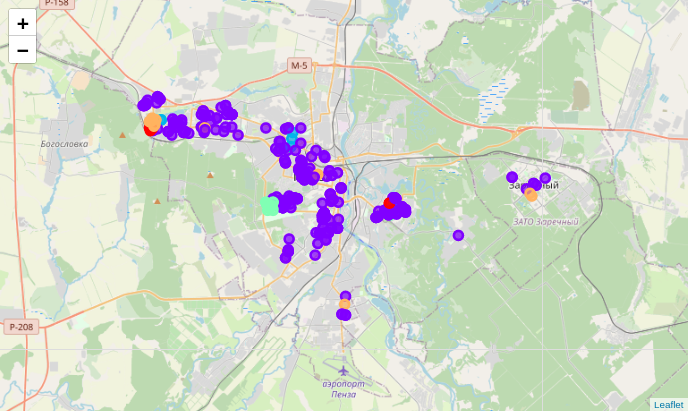

___

In [64]:
penza_merged.head()

FullAdress          District              Address NumHouse  \
0  проспект Строителей, 152   р-н Октябрьский  проспект Строителей      152   
1          улица Ленина, 12   р-н Октябрьский         улица Ленина       12   
2   улица Терновского, 158Б  р-н Первомайский    улица Терновского     158Б   
3        Онежский проезд, 8   р-н Октябрьский      Онежский проезд        8   
4       улица Суворова, 166     р-н Ленинский       улица Суворова      166   

         Tenant     NumRooms  Area  Floor  RentPrice LeaseTerm  \
0  student city  3-комн. кв.  64.0    4.0    11000.0   От года   
1  student city  3-комн. кв.  70.0    1.0    10000.0   От года   
2         owner  1-комн. кв.  40.0    9.0    11000.0   От года   
3         owner  1-комн. кв.  42.0    5.0    11000.0   От года   
4  student city  2-комн. кв.  45.0    5.0    10000.0   От года   

   CommunalPayments         Meters    Commission          Pledge  \
0            2000.0  без счётчиков  комиссия 50%      без залога   
1            3000.0  без счётчиков  комиссия 50%      без залога   
2            2000.0  без счётчиков  комиссия 50%   залог 3 000 ₽   
3            2000.0  без счётчиков  комиссия 50%  залог 10 000 ₽   
4            3000.0  без счётчиков  комиссия 50%      без залога   

                                         Description   Latitude  Longitude  \
0  Сдам 3-х ком. квартиру на длительный срок по п...  53.220538  44.888742   
1  Большая 3х комнатная квартира 70м2,в шикарном ...  53.190840  45.167690   
2  11 000 + ком.плат + 600 руб Инет и Тв (подключ...  53.144821  45.024579   
3  Сдаётся современная комфортная 1ком квартира з...  53.218907  44.942595   
4  Сдам квартиру в 2х минутах ходьбы от Филармони...  53.203453  44.989078   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0  Fast Food Restaurant         Grocery Store   
1             4.0         Shopping Mall           Snack Place   
2             1.0         Big Box Store         Shopping Mall   
3             1.0                   Gym             Pet Store   
4             1.0          Concert Hall                 Plaza   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0             Multiplex                  Café            Restaurant   
1      Sushi Restaurant         Deli / Bodega      Doner Restaurant   
2         Grocery Store           Comedy Club          Concert Hall   
3         Shopping Mall        Clothing Store           Coffee Shop   
4                   Zoo            Donut Shop           Comedy Club   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Dim Sum Restaurant   Japanese Restaurant    Italian Restaurant   
1                 Diner    Dim Sum Restaurant          Dessert Shop   
2     Convenience Store        Cosmetics Shop          Cupcake Shop   
3           Comedy Club          Concert Hall     Convenience Store   
4     Convenience Store        Cosmetics Shop          Cupcake Shop   

  9th Most Common Venue 10th Most Common Venue  
0         Shopping Mall           Cocktail Bar  
1      Department Store                    Zoo  
2          Dance Studio          Deli / Bodega  
3        Cosmetics Shop           Cupcake Shop  
4          Dance Studio          Deli / Bodega

In [111]:
penza_merged.corr()

Area     Floor  RentPrice  CommunalPayments  Latitude  \
Area              1.000000  0.072430   0.405961          0.222915 -0.071345   
Floor             0.072430  1.000000   0.057803          0.062410 -0.011891   
RentPrice         0.405961  0.057803   1.000000          0.000691 -0.087690   
CommunalPayments  0.222915  0.062410   0.000691          1.000000  0.062243   
Latitude         -0.071345 -0.011891  -0.087690          0.062243  1.000000   
Longitude        -0.104836 -0.019850  -0.061758         -0.127836  0.212269   
Cluster Labels   -0.070696  0.049108   0.006489          0.063656 -0.068028   

                  Longitude  Cluster Labels  
Area              -0.104836       -0.070696  
Floor             -0.019850        0.049108  
RentPrice         -0.061758        0.006489  
CommunalPayments  -0.127836        0.063656  
Latitude           0.212269       -0.068028  
Longitude          1.000000        0.012911  
Cluster Labels     0.012911        1.000000

In [74]:
cl_penza1 = penza_merged.loc[penza_merged['Cluster Labels'] == 0, penza_merged.columns]
cl_penza1

FullAdress             District          Address NumHouse  \
56     улица Антонова, 27  р-н Железнодорожный   улица Антонова       27   
126  Ладожская улица, 156      р-н Октябрьский  Ладожская улица      156   
204  Ладожская улица, 150      р-н Октябрьский  Ладожская улица      150   
226    улица Антонова, 27  р-н Железнодорожный   улица Антонова       27   
230     улица Пушкина, 17        р-н Ленинский    улица Пушкина       17   
253     улица Пушкина, 22        р-н Ленинский    улица Пушкина       22   
265  Ладожская улица, 164      р-н Октябрьский  Ладожская улица      164   
302    улица Антонова, 27  р-н Железнодорожный   улица Антонова       27   

           Tenant      NumRooms  Area  Floor  RentPrice LeaseTerm  \
56   Аренда-Ренза   1-комн. кв.  42.0    8.0     8000.0   От года   
126         owner   1-комн. кв.  40.0    6.0    12000.0   От года   
204         owner   1-комн. кв.  30.0    3.0    10000.0   От года   
226  student city  11-комн. кв.  38.0    2.0     7000.0   От года   
230      Авангард   2-комн. кв.  45.0    9.0    10000.0   От года   
253      Губерния   2-комн. кв.  49.0    6.0    10000.0   От года   
265      Губерния   2-комн. кв.  43.0    6.0     9000.0   От года   
302  student city   1-комн. кв.  38.0    6.0     7000.0   От года   

     CommunalPayments         Meters    Commission      Pledge  \
56                0.0    не включены  комиссия 50%  без залога   
126            2000.0  без счётчиков  комиссия 50%  без залога   
204               0.0    не включены  без комиссии  без залога   
226            1100.0  без счётчиков  комиссия 50%  без залога   
230            2000.0  без счётчиков  комиссия 50%  без залога   
253            2000.0  без счётчиков  комиссия 50%  без залога   
265            2000.0  без счётчиков  комиссия 50%  без залога   
302            1100.0  без счётчиков  комиссия 50%  без залога   

                                           Description   Latitude  Longitude  \
56   Сдам квартиру на длительный срок по ул. Антоно...  53.187509  45.058634   
126  Сдаю хорошую, современную квартиру, в новом до...  53.221017  44.875144   
204  Сдам 1ком.квартиру не гражданам России. Регист...  53.221868  44.874593   
226  Сдам однокомнатную квариру на длительный срок ...  53.187509  45.058634   
230  КОМАНДИРОВАННЫМ и гостям города - ОТЧЕТНЫЕ ДОК...  53.507735  43.665529   
253  Сдаю 2к квартиру на длительный срок. Все необх...  53.506832  43.663691   
265  Сдам двухкомнатную квартиру. Только на долгий ...  53.221664  44.876506   
302  Сдам однокомнатную квариру на длительный срок ...  53.187509  45.058634   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
56              0.0     Convenience Store                   Zoo   
126             0.0     Convenience Store                   Zoo   
204             0.0     Convenience Store                   Zoo   
226             0.0     Convenience Store                   Zoo   
230             0.0     Convenience Store                   Zoo   
253             0.0     Convenience Store                   Zoo   
265             0.0           Yoga Studio     Convenience Store   
302             0.0     Convenience Store                   Zoo   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
56           Cocktail Bar           Comedy Club          Concert Hall   
126          Cocktail Bar           Comedy Club          Concert Hall   
204          Cocktail Bar           Comedy Club          Concert Hall   
226          Cocktail Bar           Comedy Club          Concert Hall   
230          Cocktail Bar           Comedy Club          Concert Hall   
253          Cocktail Bar           Comedy Club          Concert Hall   
265     Electronics Store           Comedy Club          Concert Hall   
302          Cocktail Bar           Comedy Club          Concert Hall   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
56         Cosmetics Shop          Cupcake Shop          

In [88]:
price1 = cl_penza1.RentPrice.mean() + cl_penza1.CommunalPayments.mean()
additionally1 = cl_penza1.Commission.value_counts().index[0] + ' и ' + cl_penza1.Pledge.value_counts().index[0]
print('The cost of an apartment per month will be {} {}'.format(price1, additionally1))

The cost of an apartment per month will be 10400.0 комиссия 50% и без залога


In [104]:
cl_penza1[['Area', 'Floor', 'RentPrice', 'CommunalPayments']].corr()

Area     Floor  RentPrice  CommunalPayments
Area              1.000000  0.635737   0.137137          0.667043
Floor             0.635737  1.000000   0.223384          0.291228
RentPrice         0.137137  0.223384   1.000000          0.406793
CommunalPayments  0.667043  0.291228   0.406793          1.000000

In [107]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cl_penza1['Latitude'], cl_penza1['Longitude'], cl_penza1['FullAdress'], cl_penza1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

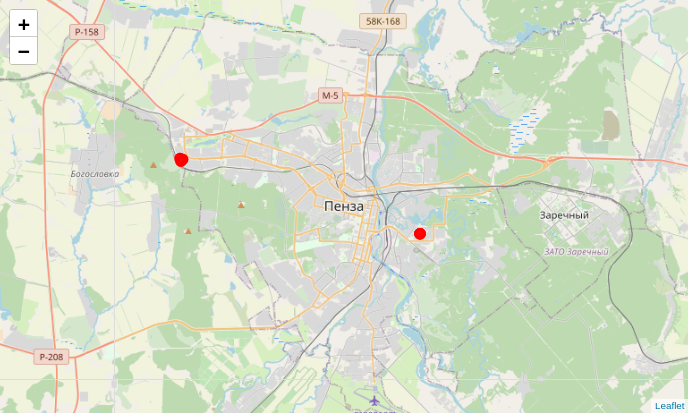

___

In [92]:
cl_penza2 = penza_merged.loc[penza_merged['Cluster Labels'] == 1, penza_merged.columns]
cl_penza2

FullAdress             District  \
0            проспект Строителей, 152      р-н Октябрьский   
2             улица Терновского, 158Б     р-н Первомайский   
3                  Онежский проезд, 8      р-н Октябрьский   
4                 улица Суворова, 166        р-н Ленинский   
6                  улица Калинина, 80     р-н Первомайский   
7                  улица Герцена, 12А  р-н Железнодорожный   
8                проспект Победы, 96Е      р-н Октябрьский   
10                улица Суворова, 168        р-н Ленинский   
11                улица Богданова, 54     р-н Первомайский   
13                улица Калинина, 123     р-н Первомайский   
14           улица 65-летия Победы, 3      р-н Октябрьский   
15                   улица Лядова, 28      р-н Октябрьский   
16               улица Суворова, 169А        р-н Ленинский   
17              Московская улица, 30а        р-н Ленинский   
18               улица Кижеватова, 19     р-н Первомайский   
19          улица 65-летия Победы, 11      р-н Октябрьский   
20                  улица Чкалова, 49     р-н Первомайский   
21                улица Бакунина, 137        р-н Ленинский   
22               улица Куйбышева, 10А     р-н Первомайский   
23              улица Лермонтова, 3к2        р-н Ленинский   
24            проспект Строителей, 71      р-н Октябрьский   
25                   улица Попова, 30     р-н Первомайский   
26          улица 65-летия Победы, 11      р-н Октябрьский   
27                   улица Попова, 38     р-н Первомайский   
29             Московская улица, 109А  р-н Железнодорожный   
30     улица Набережная реки Мойки, 7        р-н Ленинский   
31                улица Суворова, 155        р-н Ленинский   
32                 улица Бородина, 29      р-н Октябрьский   
34                  улица Пушкина, 45        р-н Ленинский   
35               Ладожская улица, 51а      р-н Октябрьский   
36                     улица Мира, 16     р-н Первомайский   
37                проспект Победы, 84      р-н Октябрьский   
39        улица Генерала Глазунова, 5      р-н Октябрьский   
40               проспект Победы, 96Е      р-н Октябрьский   
41                     улица Мира, 18     р-н Первомайский   
42              Саратовская улица, 15        р-н Ленинский   
43               Тамбовская улица, 23     р-н Первомайский   
45               Российская улица, 45     р-н Первомайский   
46              улица Лермонтова, 3к2        р-н Ленинский   
47                  улица 8 Марта, 25        р-н Ленинский   
48               проспект Победы, 96Е      р-н Октябрьский   
49                проспект Победы, 97      р-н Октябрьский   
50                улица Измайлова, 79  р-н Железнодорожный   
52                 улица Антонова, 5В  р-н Железнодорожный   
53                 улица Антонова, 5В  р-н Железнодорожный   
54                 улица Антонова, 70  р-н Железнодорожный   
55                 улица Антонова, 54  р-н Железнодорожный   
57                 улица Антонова, 74  р-н Железнодорожный   
58         Коннозаводская улица, 25/1  р-н Железнодорожный   
59                 улица Антонова, 76  р-н Железнодорожный   
61                 улица Антонова, 10  р-н Железнодорожный   
62                 улица Антонова, 76  р-н Железнодорожный   
63                 улица Антонова, 16  р-н Железнодорожный   
65                 улица Антонова, 5В  р-н Железнодорожный   
66                 улица Антонова, 5Л  р-н Железнодорожный   
67                улица Измайлова, 79  р-н Железнодорожный   
68                 улица Антонова, 20  р-н Железнодорожный   
69                 улица Антонова, 47  р-н Железнодорожный   
72                 улица Антонова, 18  р-н Железнодорожный   
73                 улица Антонова, 56  р-н Железнодорожный   
74               проспект Победы, 96Е      р-н Октябрьский   
75            проспект Строителей, 71      р-н Октябрьский   
76           улица 65-летия Победы, 5      р-н Октябрьский   
77                  улица Попова, 20А     р-н Первомайский 

In [91]:
price2 = cl_penza2.RentPrice.mean() + cl_penza2.CommunalPayments.mean()
additionally2 = cl_penza2.Commission.value_counts().index[0] + ' и ' + cl_penza2.Pledge.value_counts().index[0]
print('The cost of an apartment per month will be {} {}'.format(price2, additionally2))

The cost of an apartment per month will be 10982.222222222223 комиссия 50% и без залога


In [103]:
cl_penza2[['Area', 'Floor', 'RentPrice', 'CommunalPayments']].corr()

Area     Floor  RentPrice  CommunalPayments
Area              1.000000  0.057387   0.410319          0.256704
Floor             0.057387  1.000000   0.040470          0.074867
RentPrice         0.410319  0.040470   1.000000         -0.009612
CommunalPayments  0.256704  0.074867  -0.009612          1.000000

In [108]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cl_penza2['Latitude'], cl_penza2['Longitude'], cl_penza2['FullAdress'], cl_penza2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

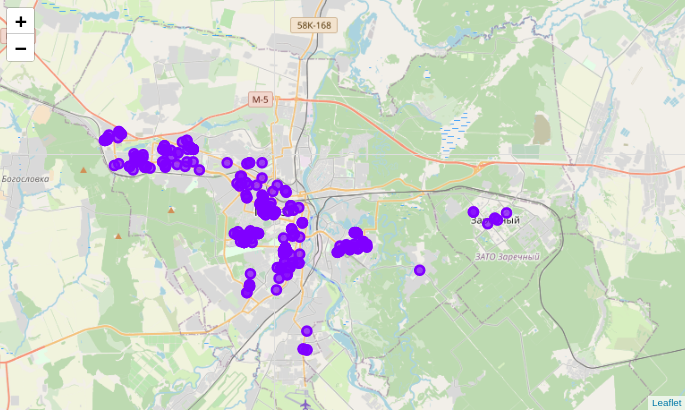

___

In [71]:
cl_penza3 = penza_merged.loc[penza_merged['Cluster Labels'] == 2, penza_merged.columns]
cl_penza3

FullAdress             District            Address NumHouse  \
5      улица Антонова, 17А  р-н Железнодорожный     улица Антонова      17А   
33       улица Лядова, 50А      р-н Октябрьский       улица Лядова      50А   
60      улица Антонова, 5А  р-н Железнодорожный     улица Антонова       5А   
64       улица Антонова, 5  р-н Железнодорожный     улица Антонова        5   
70       улица Антонова, 5  р-н Железнодорожный     улица Антонова        5   
71     улица Антонова, 17А  р-н Железнодорожный     улица Антонова      17А   
88       улица Лядова, 50А      р-н Октябрьский       улица Лядова      50А   
169      улица Антонова, 5  р-н Железнодорожный     улица Антонова        5   
233   улица Вяземского, 43        р-н Ленинский   улица Вяземского       43   
261      Ударная улица, 41      р-н Октябрьский      Ударная улица       41   
279  улица Карпинского, 27        р-н Ленинский  улица Карпинского       27   

           Tenant      NumRooms  Area  Floor  RentPrice             LeaseTerm  \
5       Уневер-58   2-комн. кв.  64.0    2.0    10000.0               От года   
33       ПОВОЛЖЬЕ   2-комн. кв.  62.0    8.0    10000.0               От года   
60   student city   3-комн. кв.  63.0    3.0    10000.0               От года   
64       Губерния   1-комн. кв.  38.0    6.0     7000.0               От года   
70       Губерния  13-комн. кв.  57.0    8.0     9000.0               От года   
71      Уневер-58   2-комн. кв.  64.0    6.0    10000.0               От года   
88   student city   1-комн. кв.  37.0    3.0     8500.0               От года   
169      Губерния   3-комн. кв.  70.0   11.0    12000.0               От года   
233  student city   1-комн. кв.  38.0   12.0     7000.0               От года   
261     Уневер-58   1-комн. кв.  36.0    8.0     7000.0               От года   
279         owner   2-комн. кв.  43.0    2.0     9000.0  На несколько месяцев   

     CommunalPayments         Meters    Commission      Pledge  \
5              3000.0  без счётчиков  комиссия 50%  без залога   
33                0.0    не включены  без комиссии  без залога   
60                0.0    не включены  комиссия 50%  без залога   
64             2500.0  без счётчиков  комиссия 50%  без залога   
70             2000.0  без счётчиков  комиссия 50%  без залога   
71                0.0    не включены  комиссия 50%  без залога   
88             2000.0  без счётчиков  комиссия 50%  без залога   
169            3000.0  без счётчиков  комиссия 50%  без залога   
233            1100.0  без счётчиков  комиссия 50%  без залога   
261               0.0    не включены  комиссия 50%  без залога   
279            5000.0  без счётчиков  комиссия 67%  без залога   

                                           Description   Latitude  Longitude  \
5    Сдаётся 2-х квартира на длительный срок по ули...  53.187000  45.061926   
33   Сдаётся 2к квартира по Лядова 50а\nОстановка т...  53.225755  44.883406   
60   Уютная 3х комнатная квартира меблированная. В ...  53.187462  45.062915   
64   Квартира в отличном состоянии.сдается только н...  53.186939  45.064025   
70   Сдается хорошая квартира район ГПЗ. Есть вся н...  53.186939  45.064025   
71   Сдаётся 2-х квартира на длительный срок по ули...  53.187000  45.061926   
88   Сдаётся отличная квартира район дальнее арбеко...  53.225755  44.883406   
169  сдам на длительный срок.из мебели и техники вс...  53.186939  45.064025   
233  Сдаётся 1 комнатная квартира на длительный сро...  53.217099  44.983736   
261  Сдается однокомнатная квартира в пятиэтажном д...  53.220058  44.984339   
279  Сдается 2-х комнатная квартира в районе Памятн...  53.213524  44.982852   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5               2.0           Snack Place         Grocery Store   
33              2.0         Grocery Store                   Zoo   
60              2.0           Snack Place         Grocery Store   
64              2.0           Snack Place         Grocery Store   
70   

In [93]:
price3 = cl_penza3.RentPrice.mean() + cl_penza3.CommunalPayments.mean()
additionally3 = cl_penza3.Commission.value_counts().index[0] + ' и ' + cl_penza3.Pledge.value_counts().index[0]
print('The cost of an apartment per month will be {} {}'.format(price3, additionally3))

The cost of an apartment per month will be 10736.363636363636 комиссия 50% и без залога


In [105]:
cl_penza3[['Area', 'Floor', 'RentPrice', 'CommunalPayments']].corr()

Area     Floor  RentPrice  CommunalPayments
Area              1.000000  0.008501   0.909715         -0.114815
Floor             0.008501  1.000000  -0.083510         -0.304160
RentPrice         0.909715 -0.083510   1.000000          0.113188
CommunalPayments -0.114815 -0.304160   0.113188          1.000000

In [109]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cl_penza3['Latitude'], cl_penza3['Longitude'], cl_penza3['FullAdress'], cl_penza3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

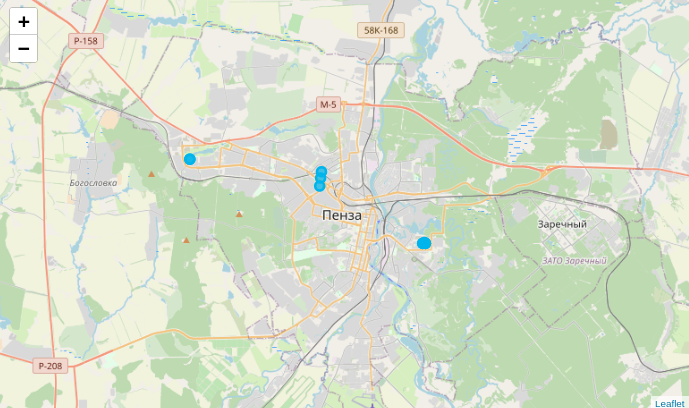

___

In [72]:
cl_penza4 = penza_merged.loc[penza_merged['Cluster Labels'] == 3, penza_merged.columns]
cl_penza4

FullAdress             District          Address NumHouse  \
12   улица Измайлова, 60А  р-н Железнодорожный  улица Измайлова      60А   
38        улица Мира, 70А     р-н Первомайский       улица Мира      70А   
44        улица Мира, 70А     р-н Первомайский       улица Мира      70А   
51   улица Измайлова, 60А  р-н Железнодорожный  улица Измайлова      60А   
79       улица Попова, 60     р-н Первомайский     улица Попова       60   
82         улица Мира, 63     р-н Первомайский       улица Мира       63   
84         улица Мира, 63     р-н Первомайский       улица Мира       63   
86        улица Мира, 70А     р-н Первомайский       улица Мира      70А   
90         улица Мира, 63     р-н Первомайский       улица Мира       63   
109        улица Мира, 67     р-н Первомайский       улица Мира       67   
118      улица Попова, 70     р-н Первомайский     улица Попова       70   
131       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
132       улица Мира, 63А     р-н Первомайский       улица Мира      63А   
137       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
138       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
139       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
147       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
190       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
211       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
219       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
222        улица Мира, 67     р-н Первомайский       улица Мира       67   
255       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
303       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
305       улица Мира, 63А     р-н Первомайский       улица Мира      63А   
306        улица Мира, 63     р-н Первомайский       улица Мира       63   
309       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
314       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
321       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
322        улица Мира, 45     р-н Первомайский       улица Мира       45   
334       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
340       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
346       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
353       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
357        улица Мира, 45     р-н Первомайский       улица Мира       45   
359        улица Мира, 68     р-н Первомайский       улица Мира       68   
372       улица Мира, 70А     р-н Первомайский       улица Мира      70А   
389      улица Попова, 62     р-н Первомайский     улица Попова       62   

           Tenant      NumRooms  Area  Floor  RentPrice LeaseTerm  \
12          owner   2-комн. кв.  60.0   10.0    15000.0   От года   
38       Губерния        Студия  28.0    2.0     9000.0   От года   
44      Уневер-58       1Студия  36.0    1.0    10000.0   От года   
51          owner   2-комн. кв.  55.0   10.0    11000.0   От года   
79          owner   2-комн. кв.  52.0   10.0    12000.0   От года   
82          owner   1-комн. кв.  37.0   10.0    11000.0   От года   
84          owner   1-комн. кв.  39.0   12.0    12000.0   От года   
86          owner   1-комн. кв.  30.0    9.0    10000.0   От года   
90       Губерния   1-комн. кв.  39.0    8.0    12000.0   От года   
109         owner  11-комн. кв.  44.0    8.0    13000.0   От года   
118         owner   2-комн. кв.  48.0   12.0     8000.0   От года   
131      Губерния        Студия  29.0    9.0     9000.0   От года   
132      Губерния   1-комн. кв.  42.0    3.0    13000.0   От года   
137      Губерния        Студия  33.0    7.0     9500.0   От года   
138      Авангард       1Студия  30.0    1.0    10000.0   От года   
139         owner     

In [94]:
price4 = cl_penza4.RentPrice.mean() + cl_penza4.CommunalPayments.mean()
additionally4 = cl_penza4.Commission.value_counts().index[0] + ' и ' + cl_penza4.Pledge.value_counts().index[0]
print('The cost of an apartment per month will be {} {}'.format(price4, additionally4))

The cost of an apartment per month will be 11575.675675675675 комиссия 50% и без залога


In [106]:
cl_penza4[['Area', 'Floor', 'RentPrice', 'CommunalPayments']].corr()

Area     Floor  RentPrice  CommunalPayments
Area              1.000000  0.410152   0.583002          0.193737
Floor             0.410152  1.000000   0.276006          0.040910
RentPrice         0.583002  0.276006   1.000000          0.241691
CommunalPayments  0.193737  0.040910   0.241691          1.000000

In [110]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cl_penza4['Latitude'], cl_penza4['Longitude'], cl_penza4['FullAdress'], cl_penza4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

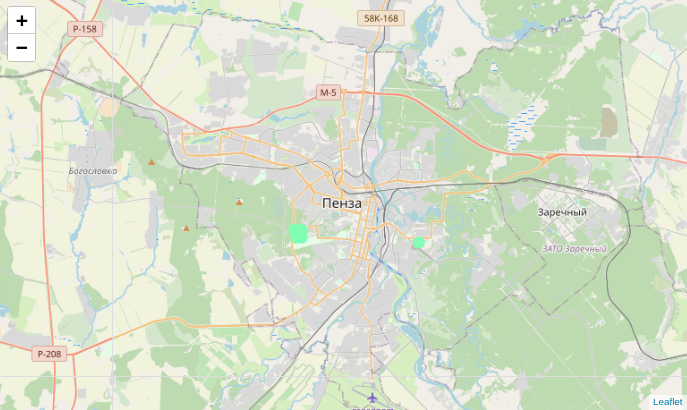

___

In [120]:
cl_penza5 = penza_merged.loc[penza_merged['Cluster Labels'] == 4, penza_merged.columns]
cl_penza5

FullAdress             District              Address  \
1            улица Ленина, 12      р-н Октябрьский         улица Ленина   
9        Ладожская улица, 128      р-н Октябрьский      Ладожская улица   
28       Ладожская улица, 155      р-н Октябрьский      Ладожская улица   
85       Ладожская улица, 149      р-н Октябрьский      Ладожская улица   
110  проспект Строителей, 74А      р-н Октябрьский  проспект Строителей   
119          улица Лядова, 62      р-н Октябрьский         улица Лядова   
122          улица Лядова, 62      р-н Октябрьский         улица Лядова   
127    улица Терновского, 170     р-н Первомайский    улица Терновского   
141       улица Суворова, 131  р-н Железнодорожный       улица Суворова   
212      Ладожская улица, 126      р-н Октябрьский      Ладожская улица   
217  проспект Строителей, 74А      р-н Октябрьский  проспект Строителей   
246      Ладожская улица, 157      р-н Октябрьский      Ладожская улица   
251      Ладожская улица, 110      р-н Октябрьский      Ладожская улица   
275      Ладожская улица, 153      р-н Октябрьский      Ладожская улица   
276      Ладожская улица, 126      р-н Октябрьский      Ладожская улица   
277      Ладожская улица, 128      р-н Октябрьский      Ладожская улица   
294      Ладожская улица, 126      р-н Октябрьский      Ладожская улица   
316      Ладожская улица, 157      р-н Октябрьский      Ладожская улица   
331       улица Суворова, 131  р-н Железнодорожный       улица Суворова   
354          улица Ленина, 18      р-н Октябрьский         улица Ленина   

    NumHouse           Tenant      NumRooms  Area  Floor  RentPrice LeaseTerm  \
1         12     student city   3-комн. кв.  70.0    1.0    10000.0   От года   
9        128         Губерния  11-комн. кв.  33.0   15.0    11000.0   От года   
28       155     Аренда-Ренза   1-комн. кв.  42.0    1.0    12000.0   От года   
85       149     student city   1-комн. кв.  38.0   12.0     8500.0   От года   
110      74А  Наталья Иванова   1-комн. кв.  49.0    2.0    10000.0   От года   
119       62         Губерния   1-комн. кв.  38.0    2.0     7000.0   От года   
122       62            owner   1-комн. кв.  40.0    4.0    12500.0   От года   
127      170            owner   2-комн. кв.  55.0    3.0    10000.0   От года   
141      131         Авангард   1-комн. кв.  34.0    3.0     8000.0   От года   
212      126            owner  11-комн. кв.  38.0    4.0     8000.0   От года   
217      74А  Наталья Иванова  11-комн. кв.  49.0   10.0    10000.0   От года   
246      157     Аренда-Ренза  11-комн. кв.  42.0   10.0    10000.0   От года   
251      110         Губерния        Студия  31.0    7.0     7000.0   От года   
275      153     student city   1-комн. кв.  42.0    9.0     9000.0   От года   
276      126     student city   1-комн. кв.  39.0    2.0     8500.0   От года   
277      128     student city   1-комн. кв.  35.0    6.0     9000.0   От года   
294      126            owner   1-комн. кв.  38.0    1.0     8000.0   От года   
316      157     Аренда-Ренза   1-комн. кв.  42.0    2.0    10000.0   От года   
331      131         Авангард  11-комн. кв.  34.0    7.0     8000.0   От года   
354       18     student city   1-комн. кв.  20.0    2.0     5000.0   От года   

     CommunalPayments         Meters    Commission          Pledge  \
1              3000.0  без счётчиков  комиссия 50%      без залога   
9              2000.0  без счётчиков  комиссия 50%      без залога   
28                0.0    не включены  комиссия 50%      без залога   
85             2000.0  без счётчиков  комиссия 50%      без залога   
110            3000.0  без счётчиков  комиссия 50%   залог 3 000 ₽   
119            2000.0  без счётчиков  комиссия 50%      без залога   
122               0.0    не включены  комиссия 50%  залог 12 500 ₽   
127            2500.0  без счётчиков  комиссия 50%      без залога   
141            2000.0  без счётчиков  комиссия 50%      без залога   
212            2000.0  без счётчиков  ком

In [121]:
price5 = cl_penza5.RentPrice.mean() + cl_penza5.CommunalPayments.mean()
additionally5 = cl_penza5.Commission.value_counts().index[0] + ' и ' + cl_penza5.Pledge.value_counts().index[0]
print('The cost of an apartment per month will be {} {}'.format(price5, additionally5))

The cost of an apartment per month will be 10750.0 комиссия 50% и без залога


In [122]:
cl_penza5[['Area', 'Floor', 'RentPrice', 'CommunalPayments']].corr()

Area     Floor  RentPrice  CommunalPayments
Area              1.000000 -0.197543   0.522399          0.238953
Floor            -0.197543  1.000000   0.138121          0.120064
RentPrice         0.522399  0.138121   1.000000         -0.338335
CommunalPayments  0.238953  0.120064  -0.338335          1.000000

In [123]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cl_penza5['Latitude'], cl_penza5['Longitude'], cl_penza5['FullAdress'], cl_penza5['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster = int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

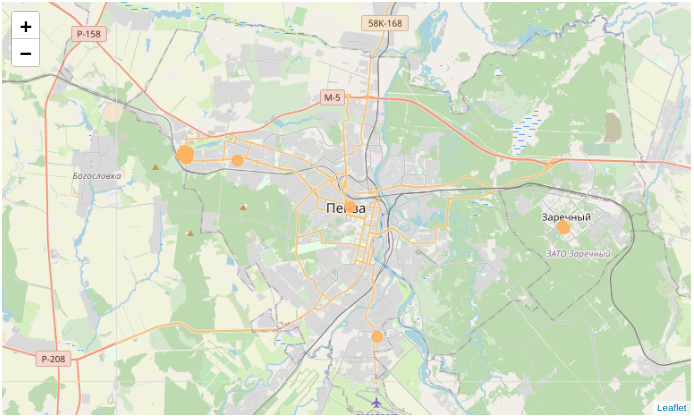

___

Group data to understand their quantity.

In [119]:
df_group = penza_merged[['District', 'Cluster Labels', 'RentPrice']]
grouped_test = df_group.groupby(['District', 'Cluster Labels'], as_index=False).mean()
grouped_test

District  Cluster Labels     RentPrice
0   р-н Железнодорожный             0.0   7333.333333
1   р-н Железнодорожный             1.0   8959.016393
2   р-н Железнодорожный             2.0   9666.666667
3   р-н Железнодорожный             3.0  13000.000000
4   р-н Железнодорожный             4.0   8000.000000
5         р-н Ленинский             0.0  10000.000000
6         р-н Ленинский             1.0   9837.209302
7         р-н Ленинский             2.0   8000.000000
8       р-н Октябрьский             0.0  10333.333333
9       р-н Октябрьский             1.0   8906.976744
10      р-н Октябрьский             2.0   8500.000000
11      р-н Октябрьский             4.0   9147.058824
12     р-н Первомайский             1.0   9762.195122
13     р-н Первомайский             3.0   9585.714286
14     р-н Первомайский             4.0  10000.000000

In [136]:
df_group_top = penza_merged[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', 'District', 'Cluster Labels', 'RentPrice']]
df_group_top1 = df_group_top.groupby(['Cluster Labels', '1st Most Common Venue'], as_index=False).mean()
df_group_top2 = df_group_top.groupby(['Cluster Labels', '2nd Most Common Venue'], as_index=False).mean()
df_group_top3 = df_group_top.groupby(['Cluster Labels', '3rd Most Common Venue'], as_index=False).mean()
df_group_top1

Cluster Labels          1st Most Common Venue     RentPrice
0              0.0              Convenience Store   9142.857143
1              0.0                    Yoga Studio   9000.000000
2              1.0                  Auto Workshop  12000.000000
3              1.0                         Bakery   9666.666667
4              1.0                          Beach   8166.666667
5              1.0                Bed & Breakfast   9285.714286
6              1.0                  Big Box Store   8588.235294
7              1.0                    Bus Station   8250.000000
8              1.0               Business Service   9642.857143
9              1.0                           Café   8869.565217
10             1.0           Caucasian Restaurant  14000.000000
11             1.0                    Coffee Shop  10300.000000
12             1.0                    Comedy Club   7500.000000
13             1.0                   Concert Hall   9625.000000
14             1.0               Doner Restaurant  10000.000000
15             1.0                     Donut Shop   8000.000000
16             1.0              Electronics Store   8227.272727
17             1.0           Fast Food Restaurant   9000.000000
18             1.0                         Forest  10250.000000
19             1.0        Fruit & Vegetable Store  10000.000000
20             1.0              German Restaurant   9000.000000
21             1.0                  Grocery Store  10537.037037
22             1.0                            Gym   9818.181818
23             1.0           Gym / Fitness Center   7214.285714
24             1.0                       Gym Pool  10100.000000
25             1.0                 Hardware Store  15000.000000
26             1.0                 History Museum  12500.000000
27             1.0                   Hockey Field   7600.000000
28             1.0                         Hostel   9166.666667
29             1.0                            Inn  12500.000000
30             1.0                    Karaoke Bar   8333.333333
31             1.0                         Market   8166.666667
32             1.0                 Massage Studio   6000.000000
33             1.0                  Movie Theater  15400.000000
34             1.0                  Moving Target   8500.000000
35             1.0                         Museum   7000.000000
36             1.0                      Nightclub   8000.000000
37             1.0                         Notary  15000.000000
38             1.0  Paper / Office Supplies Store   9333.333333
39             1.0                           Park   8065.217391
40             1.0                      Pet Store  11200.000000
41             1.0                       Pharmacy   8000.000000
42             1.0                       Platform  15000.000000
43             1.0                     Playground  13000.000000
44             1.0                          Plaza   8000.000000
45             1.0                     Restaurant   9333.333333
46             1.0                    Roller Rink   8000.000000
47             1.0                  Shopping Mall   9406.250000
48             1.0                   Soccer Field   8600.000000
49             1.0            Sporting Goods Shop   9833.333333
50             1.0                    Supermarket   7500.000000
51             1.0               Sushi Restaurant  10250.000000
52             1.0                     Theme Park   8200.000000
53             1.0                    Video Store  15333.333333
54             1.0                  Women's Store   8000.000000
55             1.0                    Yoga Studio  12500.000000
56             1.0                            Zoo   8857.142857
57             2.0                  Grocery Store   8300.000000
58             2.0                    Snack Place   9666.666667
59             3.0                    Comedy Club  12000.000000
60             3.0              Food & Drink Shop   9514.705882
61             3.0               Sus

In [134]:
df_group_top2

2nd Most Common Venue  Cluster Labels     RentPrice
0                             ATM             1.0   9750.000000
1                        Aquarium             1.0   9875.000000
2                          Arcade             1.0   8000.000000
3                     Art Gallery             1.0   8550.000000
4              Athletics & Sports             1.0   7000.000000
5                       BBQ Joint             1.0   9500.000000
6                             Bar             1.0  13666.666667
7              Basketball Stadium             3.0   9022.727273
8                   Big Box Store             1.0   9625.000000
9                   Bowling Alley             1.0   6666.666667
10                 Breakfast Spot             1.0   9500.000000
11                    Bus Station             1.0   6500.000000
12               Business Service             1.0  10000.000000
13                      Cafeteria             1.0   8000.000000
14                           Café             1.0   8500.000000
15                   Camera Store             1.0   8000.000000
16                    Candy Store             1.0   7250.000000
17                         Castle             1.0   8833.333333
18                    Comedy Club             1.0  11000.000000
19                    Comedy Club             3.0   7000.000000
20                   Concert Hall             1.0  12625.000000
21              Convenience Store             0.0   9000.000000
22              Convenience Store             1.0   9666.666667
23                 Cosmetics Shop             1.0  10000.000000
24                   Dance Studio             1.0   7000.000000
25                  Deli / Bodega             1.0   7000.000000
26               Department Store             1.0   8000.000000
27               Department Store             4.0   8000.000000
28               Doner Restaurant             1.0  12000.000000
29              Electronics Store             1.0  12000.000000
30           Fast Food Restaurant             1.0   8750.000000
31                    Flower Shop             1.0   9916.666667
32              Food & Drink Shop             1.0  11500.000000
33              Food & Drink Shop             3.0  12666.666667
34                      Gastropub             1.0   8166.666667
35                  Grocery Store             1.0   8235.294118
36                  Grocery Store             2.0   9666.666667
37                  Grocery Store             4.0   9666.666667
38                            Gym             1.0  13333.333333
39           Gym / Fitness Center             1.0   8000.000000
40                   Hockey Arena             1.0   8200.000000
41                         Hostel             1.0   8000.000000
42                  Hot Dog Joint             1.0   5166.666667
43                          Hotel             1.0  11000.000000
44            Indie Movie Theater             1.0   7500.000000
45                            Inn             1.0   8500.000000
46             Italian Restaurant             2.0   7000.000000
47                    Karaoke Bar             1.0  10000.000000
48                   Liquor Store             1.0   8500.000000
49              Mobile Phone Shop             1.0   8000.000000
50                  Moving Target             1.0  10000.000000
51                         Museum             1.0   9400.000000
52  Paper / Office Supplies Store             1.0   7500.000000
53                           Park             1.0  23000.000000
54                      Pet Store             1.0  10500.000000
55                       Pharmacy             1.0   9000.000000
56                    Pizza Place             1.0  10050.000000
57                    Pizza Place             2.0   7000.000000
58                     Playground             1.0   7500.000000
59                          Plaza             1.0  10500.000000
60                     Restaurant             1.0  16500.000000
61                          River           

In [135]:
df_group_top3

3rd Most Common Venue  Cluster Labels     RentPrice
0                      ATM             1.0  10000.000000
1       Athletics & Sports             1.0   4500.000000
2                   Bakery             1.0   7250.000000
3                      Bar             1.0   7666.666667
4       Basketball Stadium             3.0   9500.000000
5                Bookstore             1.0   7500.000000
6              Bus Station             1.0  10000.000000
7                     Café             1.0   8772.727273
8             Cocktail Bar             0.0   9142.857143
9             Cocktail Bar             1.0  10000.000000
10             Coffee Shop             1.0  10000.000000
11             Comedy Club             1.0  10000.000000
12            Concert Hall             1.0  10000.000000
13       Convenience Store             1.0  10000.000000
14       Convenience Store             4.0   9000.000000
15            Cupcake Shop             1.0   9625.000000
16            Dance Studio             1.0   7500.000000
17           Deli / Bodega             1.0   9000.000000
18        Department Store             1.0   8750.000000
19            Dessert Shop             1.0  12000.000000
20                   Diner             1.0   5166.666667
21        Doner Restaurant             1.0   8250.000000
22              Donut Shop             1.0   9500.000000
23              Donut Shop             2.0   9166.666667
24              Donut Shop             3.0  12250.000000
25       Electronics Store             0.0   9000.000000
26       Electronics Store             1.0   9159.090909
27       Electronics Store             2.0  10000.000000
28       Electronics Store             4.0   8333.333333
29    Fast Food Restaurant             1.0   9285.714286
30       Food & Drink Shop             1.0   8884.615385
31                  Forest             1.0  10000.000000
32  Furniture / Home Store             1.0   7500.000000
33               Gastropub             1.0  10000.000000
34            Gourmet Shop             3.0   7000.000000
35           Grocery Store             1.0   8666.666667
36           Grocery Store             4.0  10000.000000
37                     Gym             1.0   6000.000000
38    Gym / Fitness Center             1.0  10000.000000
39          History Museum             1.0   8000.000000
40            Hockey Arena             1.0   8700.000000
41            Hockey Arena             2.0   9333.333333
42                   Hotel             1.0   7000.000000
43     Indie Movie Theater             1.0   6500.000000
44                     Inn             1.0   9000.000000
45               Irish Pub             1.0   8166.666667
46             Karaoke Bar             1.0  12000.000000
47              Kids Store             1.0   8000.000000
48                    Lake             1.0   8166.666667
49            Liquor Store             1.0  14285.714286
50       Mobile Phone Shop             1.0   8666.666667
51               Multiplex             1.0   9000.000000
52                  Museum             1.0   8857.142857
53               Pet Store             1.0  13250.000000
54             Pizza Place             1.0  11208.333333
55              Playground             1.0  11333.333333
56                   Plaza             1.0  11285.714286
57               Rest Area             1.0  11625.000000
58              Restaurant             1.0   8733.333333
59          Scenic Lookout             1.0   6000.000000
60           Shopping Mall             1.0   7875.000000
61            Skating Rink             1.0   9500.000000
62             Snack Place             1.0  12000.000000
63            Soccer Field             1.0   7000.000000
64          Soccer Stadium             1.0  11083.333333
65        Sushi Restaurant             4.0  10000.000000
66                Tea Room             1.0   8500.000000
67                 Theater             1.0  19000.000000
68              Theme Park             1.0  12000.000000
69             

## Results

The analysis performed gave us the segmentation of the Penza city districts. We received 5 groups, each of which has its own average rental price. 

Thanks to the **BeautifulSoup** library, we were able to render the HTML page. This gave us the basis of our data and the object of analysis. The data cleansing section showed how important it is to select the right information. 

Next, we used the **geopy** library to get location data (latitude and longitude). 

After that, we used **Foursquare** - API to obtain information on the coordinates of an object. 

Data was visualized using the **folium** library. 

For each group received, an analysis was carried out, in which information was disclosed, allowing you to rent a good apartment. The **k-means** algorithm was chosen for classification.

## Conclusion

In this project, we carried out an up-to-date analysis and segmented the areas of the city of Penza where apartments are for rent. Based on the data obtained, we can choose an apartment based not only on the monetary parameter, but also on the classification of the area, infrastructure, personal preferences and location.

I did not begin to determine which apartment is better, since this is a purely individual task for everyone. After all, as I said in the introduction, there are a lot of reasons for renting an apartment. However, you now have enough data to make a choice.